In [44]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [63]:
#abro los datasets
aeroparque_df = pd.read_csv("./data/dataset_aeroparque_19772018.csv",delimiter=',', na_values="-99.9") #datos desde 1960-2017      
bsas_df = pd.read_csv("./data/dataset_bsas_19772018.csv",delimiter=',', na_values="-99.9") #datos desde 1960-2017


In [65]:
# Mostrar info general de nuestro df (Aeroparque)
print(f'Info de Aeroparque:')
filas = np.shape(aeroparque_df)[0]
print(f'Filas: {filas}')
columnas = np.shape(aeroparque_df)[1]
print(f'Columnas: {columnas}\r\n')
print(f'Types: \n{aeroparque_df.dtypes}\r\n')
print(f'Head: \n{aeroparque_df.head()}\r\n')


# Mostrar info general de nuestro df (Bs As)
print(f'Info de Bs As:')
filas = np.shape(bsas_df)[0]
print(f'Filas: {filas}')
columnas = np.shape(bsas_df)[1]
print(f'Columnas: {columnas}\r\n')
print(f'Types: \n{bsas_df.dtypes}\r\n')
print(f'Head: \n{bsas_df.head()}\r\n')

Info de Aeroparque:
Filas: 15340
Columnas: 7

Types: 
anio            int64
mes             int64
dia             int64
precip        float64
tmax          float64
tmin          float64
diaDelAnio      int64
dtype: object

Head: 
   anio  mes  dia  precip  tmax  tmin  diaDelAnio
0  1977    1    1     0.0  25.4  20.2           1
1  1977    1    2     7.2  25.5  18.9           2
2  1977    1    3     0.0  27.6  18.3           3
3  1977    1    4    15.2  26.2  19.5           4
4  1977    1    5     0.0  29.4  16.0           5

Info de Bs As:
Filas: 15340
Columnas: 7

Types: 
anio            int64
mes             int64
dia             int64
precip        float64
tmax          float64
tmin          float64
diaDelAnio      int64
dtype: object

Head: 
   anio  mes  dia  precip  tmax  tmin  diaDelAnio
0  1977    1    1     0.0  27.5  19.0           1
1  1977    1    2    12.7  25.7  18.6           2
2  1977    1    3     0.0  27.7  17.6           3
3  1977    1    4    13.0  26.7  19.4       

In [67]:
# Verificar existencia de Nulls => HAY DATOS FALTANTES
print(f'Any nulls in columns (Aeroparque): \n{aeroparque_df.isnull().any()}\r\n')
print(f'Any nulls in columns(Bs As): \n{bsas_df.isnull().any()}\r\n')

Any nulls in columns (Aeroparque): 
anio          False
mes           False
dia           False
precip         True
tmax           True
tmin           True
diaDelAnio    False
dtype: bool

Any nulls in columns(Bs As): 
anio          False
mes           False
dia           False
precip         True
tmax           True
tmin           True
diaDelAnio    False
dtype: bool



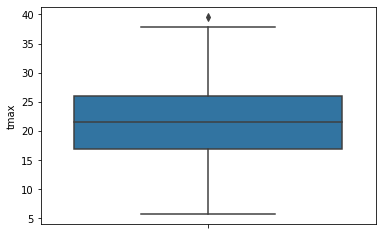

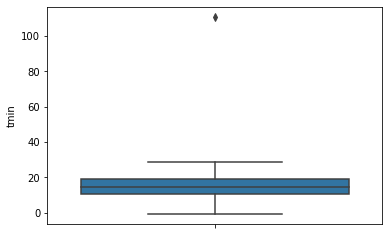

In [68]:
#boxplots para tmax y tmin (AEROPARQUE)
bxplot_tmax = sns.boxplot(x=aeroparque_df["tmax"],orient="v") 
plt.show()


bxplot_tmin = sns.boxplot(x=aeroparque_df["tmin"],orient="v") 
plt.show()

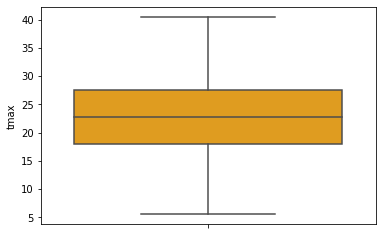

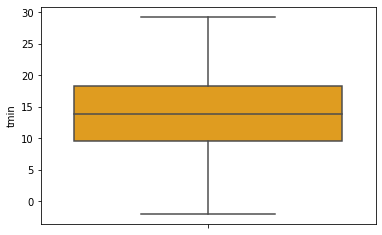

In [69]:
#boxplots para tmax y tmin (BSAS)
bxplot_tmax = sns.boxplot(x=bsas_df["tmax"],orient="v",color="orange") 
plt.show()


bxplot_tmin = sns.boxplot(x=bsas_df["tmin"],orient="v",color="orange") 
plt.show()

In [70]:
#inconsistencias (tmax>=tmin) -> AEROPARQUE
errores_aerop = aeroparque_df[aeroparque_df['tmax'] <= aeroparque_df['tmin']] 
errores_aerop

,anio,mes,dia,precip,tmax,tmin,diaDelAnio
2651,1984,4,5,0.0,25.0,111.0,96


In [71]:
#inconsistencias (tmax>=tmin) -> BSAS
errores_bsas = bsas_df[bsas_df['tmax'] <= bsas_df['tmin']] 
errores_bsas

,anio,mes,dia,precip,tmax,tmin,diaDelAnio
1953,1982,5,8,9.6,25.4,29.3,128
2335,1983,5,26,0.0,12.1,12.8,145
2553,1983,12,30,0.0,26.6,29.3,363
2648,1984,4,3,0.9,7.6,10.2,93


In [7]:
#identificamos las filas donde hay NaNs
is_NaN = aeroparque_df.isnull()
rows_NaNs = aeroparque_df[is_NaN.any(axis=1)]
rows_NaNs

,anio,mes,dia,precip,tmax,tmin,diaDelAnio
1500,1981,2,9,0.0,NaN,18.0,40
1501,1981,2,10,0.0,NaN,19.6,41
1502,1981,2,11,0.0,NaN,20.3,42
1503,1981,2,12,0.0,NaN,22.2,43
2099,1982,10,1,0.0,18.5,NaN,274
...,...,...,...,...,...,...,...
15134,1990,5,27,NaN,NaN,NaN,160
15135,1990,5,28,NaN,NaN,NaN,161
15136,1990,5,29,NaN,NaN,NaN,162
15137,1990,5,30,NaN,NaN,NaN,163
